In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract
%matplotlib inline

In [3]:
# First let's see the name of the images and explore the directory
filenames = os.listdir('../input/images/')
print(filenames)

['img_en_2.jpg', 'img_bn_3.png', 'img_china_4.png', 'img_en_1.jpg']


<class 'numpy.ndarray'>
267 600 3


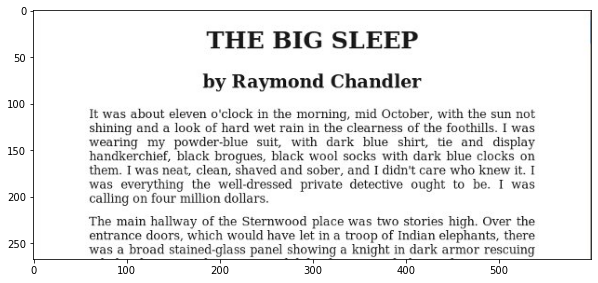

In [4]:
# Let's start with a simple image
img = cv2.imread("../input/images/img_en_1.jpg") # image in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = [10,10])
height,width,channel = img.shape
plt.imshow(img)

print(type(img))
print(height,width,channel)

In [5]:
# as the image is simple enough, image_to_string method reads all characters almost perfectly!
text = pytesseract.image_to_string(img)
print(text)

THE BIG SLEEP
by Raymond Chandler

It was about eleven o'clock in the morning, mid October, with the sun not
shining and a look of hard wet rain in the clearness of the foothills. I was
wearing my powder-blue suit, with dark blue shirt, tie and display
handkerchief, black brogues, black wool socks with dark blue clocks on
them. I was neat, clean, shaved and sober, and I didn’t care who knew it. I
was everything the well-dressed private detective ought to be. T was
calling on four million dollars.

‘The main hallway of the Sternwood place was two stories high. Over the
entrance doors, which would have let in a troop of Indian elephants, there
‘was a broad stained-glass panel showing a knight in dark armor rescuing


In [6]:
# the output of OCR can be saved in a file in necessary
file = open('output.txt','a') # file opened in append mode
file.write(text)
file.close()

(2640, 2250, 3)
ass A> 3
esign before you implement

._alarly if the project involves designi
particul y designing a product or service, ensur

best possible , ;
ou have the p answer in the design phase before you stat
‘ C \ ¢ rt

ation. Another 80/20 rule say
‘mplement e says that 20 per cent of the prob

Jems with any design project cause 80 per cent of the costs o1
- Overruns

and that 80 per cent of these critical problems arise in the design ph

ei Es : ; l p }
and are hugely expensive to correct later, requiring massive rework
é ¥ q) x } |

ases retooling.

]

, some Cc

i


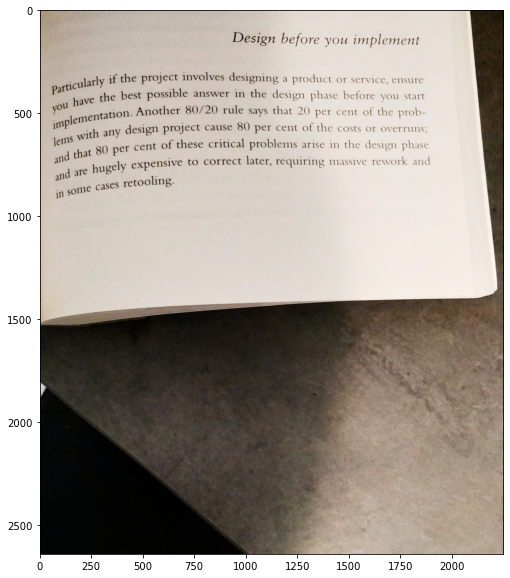

In [7]:
## lets start with a bit more complex image
# the illumination isn't good as previous one. So the accuracy of OCR is deterioorating

img2 = cv2.imread('../input/images/img_en_2.jpg')
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB) # we want the image in RGB mode

text2= pytesseract.image_to_string(img2)
fig = plt.figure(figsize = [10,10])
plt.imshow(img2)

print(img2.shape)
print(text2)


#we can see that the OCR for this image isn't that great. 
#Also it accidently read some of the texts form the previous page!

(1320, 1125, 3)


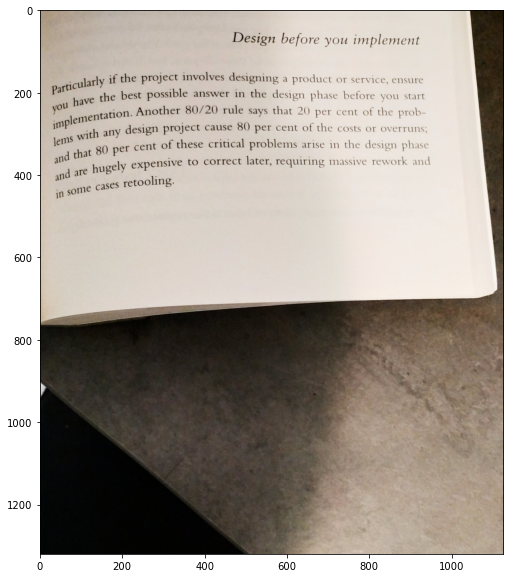

In [8]:
## Let's do some image processing for better OCR

img2= cv2.resize(img2,None, fx=.5, fy=0.5) #resizing the image
print(img2.shape)
fig= plt.figure(figsize= [10,10])
plt.imshow(img2)

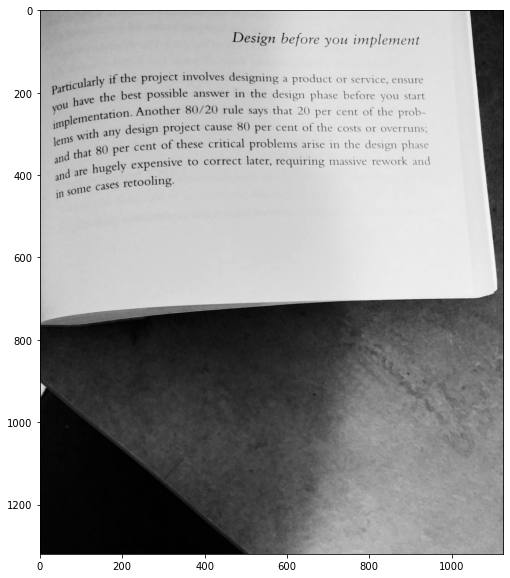

In [9]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)   # converting image to grayscale
fig = plt.figure(figsize= [10,10])
plt.imshow(gray,cmap='gray', vmin=0, vmax=255)  # while plotting grayscale image with matplotlib, cmap should be defined

In [10]:
text2= pytesseract.image_to_string(gray)
print(text2)
## we can already see the improvement in result

Design before you implement

- ularly if the project involves designing a product or service, ensure
partic the best possible answer in the design phase before you start
_ tion. Another 80/20 rule says that 20 per cent of the prob

eg design project cause 80 per cent of the costs or overrun
Jems with ie descr of these critical problems arise in the design phas
gnd that SOE {

ly expensive to correct later, requiring massive rew ork an
ely %

and ate hug

me cases retooling.
0

in S$


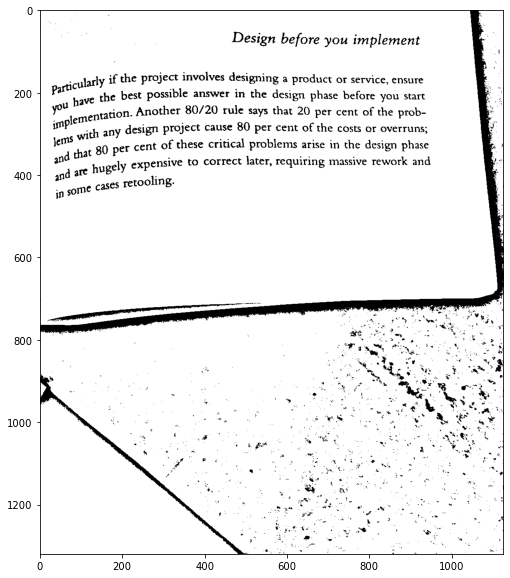

In [11]:
#some letters are coming from previous page.lets try adaptive thresholding
adaptive_threshold = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,85, 11 )
fig = plt.figure(figsize= [10,10])
plt.imshow(adaptive_threshold,cmap='gray', vmin=0, vmax=255)

In [12]:
text2= pytesseract.image_to_string(adaptive_threshold)
print(text2)
## the accuracy has improved even more!
# however, still pytesseract couldn't recognize a lot of characters, further processing can improve the scenatio.

Design before you implement

- ularly if the project involves designing a product or service, ensure
pare the best possible answer in the design phase before you start
u have tion. Another 80/20 rule says that 20 per cent of the prob-
ignplemen’a design project cause 80 per cent of the costs or overruns;
Jems with ee cent of these critical problems arise in the design phase
and anne expensive to correct later, requiring massive rework and
and are

. some cases retooling.
in


## working with Bengali OCR
* now the language sould be defined. But pytesseract doesn't have Bengali language by default. So a file called Bengali.trineddata needed to be added in the directory in which pytecessaract is installed in this virtual machine!

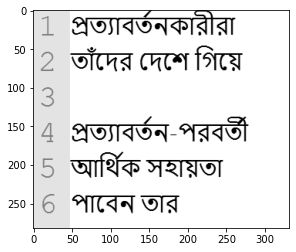

In [13]:
img3 = cv2.imread('../input/images/img_bn_3.png')
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
plt.imshow(gray3,cmap='gray', vmin=0, vmax=255)

In [14]:
## the following line will throw error as bengali is not added as language by default
text3 = pytesseract.image_to_string(gray3, lang='../input/book-pages/Bengali.traineddata' )
print(text3)

TesseractError: (1, 'tesseract: /opt/conda/lib/libtiff.so.5: no version information available (required by /usr/lib/x86_64-linux-gnu/liblept.so.5) Error opening data file /usr/share/tesseract-ocr/4.00/tessdata/../input/book-pages/Bengali.traineddata.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'../input/book-pages/Bengali.traineddata\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [15]:
## From the error messaage, we can see that pytesessaract is installed in the directory called '/usr/share/tesseract-ocr'
# it is trying to search for the language file in the following directory
filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

## we need to add the bengali.tranerdata in this directory

['eng.traineddata', 'pdf.ttf', 'tessconfigs', 'configs', 'osd.traineddata']


In [16]:
## this block of code is taken from (https://realpython.com/working-with-files-in-python/) tutorial

import shutil
src = '../input/Bengali.traineddata'
dest = '/usr/share/tesseract-ocr/4.00/tessdata/'
shutil.copy(src, dest)

filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames) # check that the file is added in this directory which was not present before.

['eng.traineddata', 'pdf.ttf', 'tessconfigs', 'configs', 'osd.traineddata', 'Bengali.traineddata']


In [17]:
## Now our language is set !
## let's process the image and detect the characters!

img3 = cv2.imread('../input/images/img_bn_3.png')
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
ret,thresh3 = cv2.threshold(img3,127,255,cv2.THRESH_BINARY)  # binary thresholding

In [18]:
## this function shows two images side-by-side
# this function will plot two images side by side
def plot_two_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1= fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2= fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

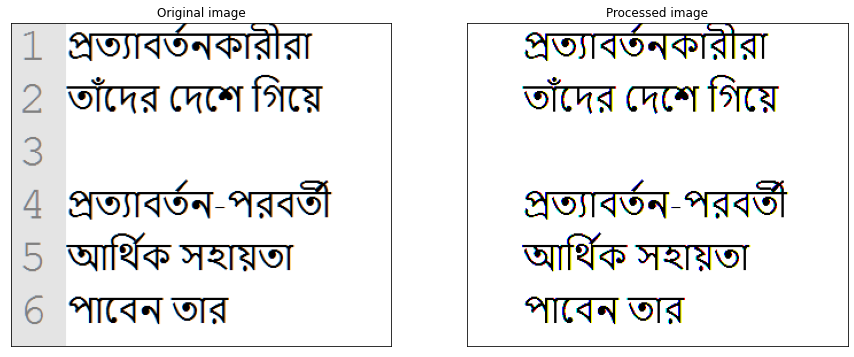

In [19]:
plot_two_images(img3, thresh3, 'Original image', 'Processed image')

In [20]:
text3 = pytesseract.image_to_string(thresh3, lang='Bengali' )
print(text3)

প্রত্যাবতনকারীরা
তাঁদের দেশে গিয়ে

প্রত্যাবর্তন-পরবর্তী
আর্থিক সহায়তা
পাবেন তার


# References:
1. [Text recognition(OCR) with Tesseract and Python](https://www.youtube.com/watch?v=JkzFjj2hjtw)
2. [Pytesseract for Bengali language](https://stackoverflow.com/questions/43034112/detecting-bangla-character-using-pytesseract)
3. [Bengali traineddata for pytesseract](https://github.com/tesseract-ocr/tessdata/blob/master/script/Bengali.traineddata)
4. [File mapulation with python OS directory](https://realpython.com/working-with-files-in-python/)